<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2026-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Joel Gómez Uribe
### Rodrigo Vega Vilchis
---

In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from ipywidgets import *
%matplotlib widget

# 2.1 Integración y Diferenciación numérica.

#### En este *Notebook* presentaremos diversos métodos para el cálculo de integrales y derivadas.


## Métedos de Integración numérica

#### Supongamos que deseamos calcular la integral de una función $f(x)$ (de una sola variable) con respecto a $x$ en un intervalo finito de $x=a$ hasta $x = b$, la cual denotamos como $I(a,b)$:
<h3 align="center">$
    \displaystyle I(a,b) = \displaystyle \int_{a}^{b} f(x) \,dx  
$</h3> 

#### Como ejemplo usemos la siguiente función $f(x)$:
 
<h3 align="center">$
    \displaystyle f(x) = (x - 5)^3  + 50sen^2(x) + 100
$</h3> 

#### donde $a = 1$ y $b = 9$.

In [3]:
def f(x):
    return (x - 5)**3  + 50*(np.sin(x))**2 + 100

In [4]:
X = np.linspace(0,10,1000)
Fx = f(X)
a = 1
b = 9

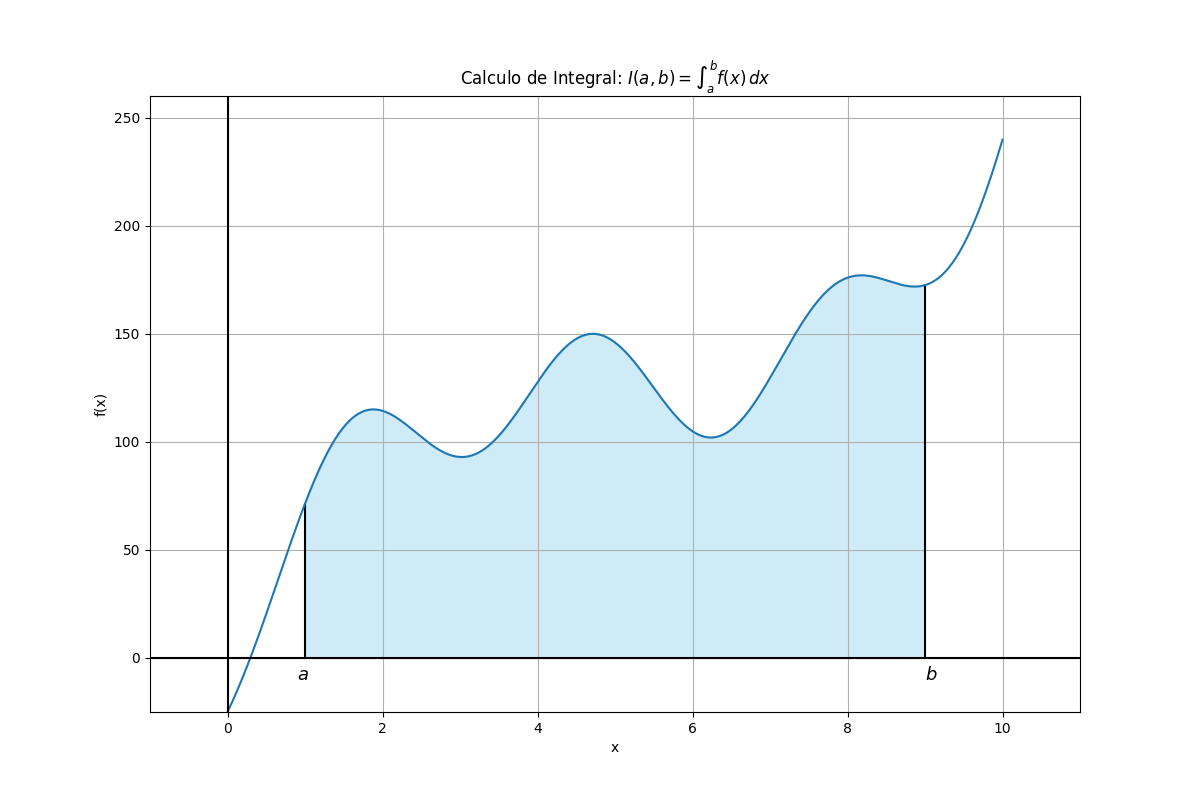

In [5]:
fig, ax = plt.subplots(figsize=((12,8)))


xy1 = (a, 0)
xy2 = (a, float(f(a)))
plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]],color='black')

xy1B = (b, 0)
xy2B = (b, float(f(b)))
plt.plot([xy1B[0], xy2B[0]], [xy1B[1], xy2B[1]],color='black')

plt.xlim(-1, 11)
plt.ylim(-25, 260)
plt.text(a-0.1,-10,r'$a$', size=13)
plt.text(b,-10,r'$b$', size=13)

plt.plot(X,Fx)
Xf = X[(X >= a) & (X <= b)]
plt.fill_between(Xf,f(Xf), color='skyblue', alpha=0.4)

plt.title(r'Calculo de Integral: $I(a,b) = \int_{a}^{b} f(x) \,dx $')
plt.ylabel("f(x)")
plt.xlabel("x")
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()

### Método del trapecio

---

#### Como vimos en clase (o en las notas) una forma de aproximar la integral es usar la **regla (o método) del Trapecio**, la cual, aunque simple, proporciona resultados muy buenos para la aproximación del área bajo la curva.

<h3 align="center">$
\displaystyle I(a,b) \simeq \displaystyle h \left[ \dfrac{f(a)+f(b)}{2} + \sum_{k=1}^{N-1} f(a + kh)   \right]
$</h3> 

$\;$

In [6]:
def IntegracionTrapecio(a,b,N,f):
    
    h = (b-a)/N
    I = (f(a) + f(b))/2

    for i in range(1,N):
        I = I + f(a + i*h)
    
    I = h*I

    return float(I)

interactive(children=(IntSlider(value=5, description='N', max=150, min=1), IntSlider(value=1, description='a',…

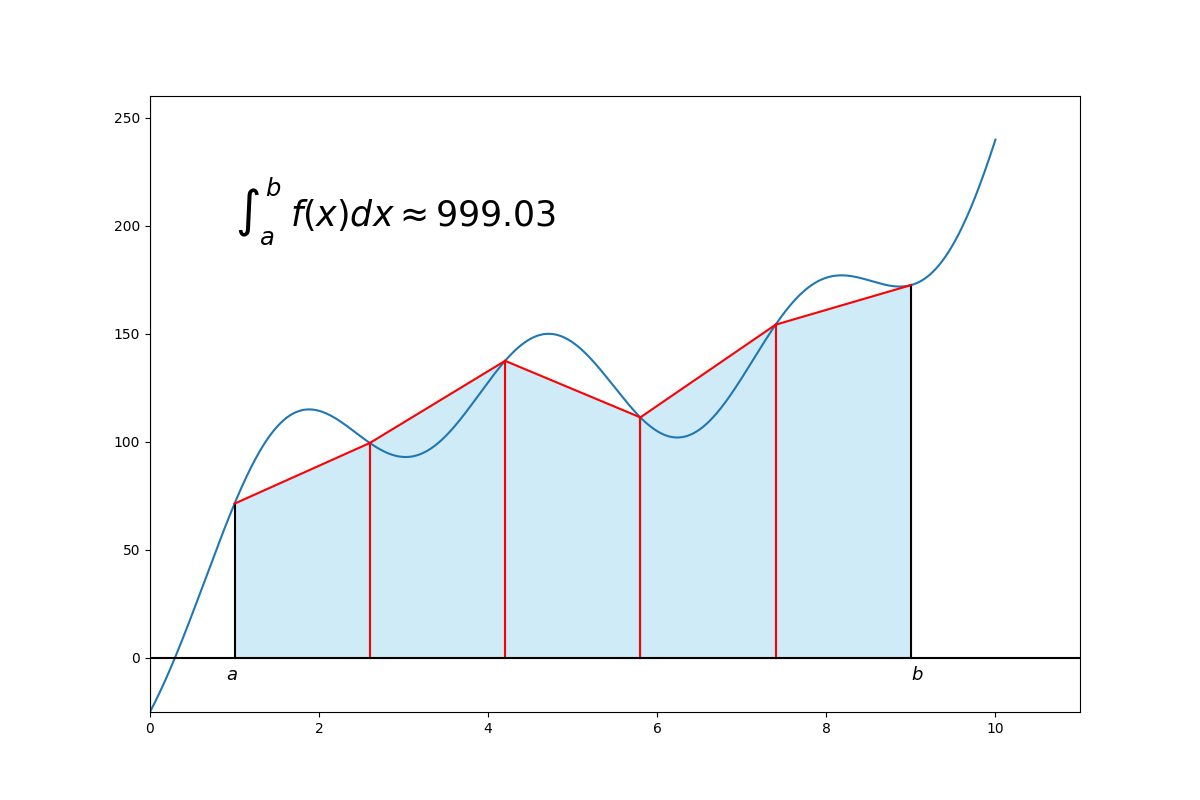

In [13]:
fig, ax = plt.subplots(figsize=((12,8)))


@widgets.interact(N=(1, 150, 1),a=(1, 9, 1),b=(2, 10, 1))

def update(N = 5, a = 1, b = 9): 
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()

    h = (b-a)/N

    plt.plot(X,Fx)
    plt.xlim(0, 11)
    plt.ylim(-25, 260) 
    
    xy1 = (a, 0)
    xy2 = (a, float(f(a)))
    plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]],color='black')
    
    xy1B = (b, 0)
    xy2B = (b, float(f(b)))
    plt.plot([xy1B[0], xy2B[0]], [xy1B[1], xy2B[1]],color='black')
    
    rr = (a,f(a))
    hh = (a+h,f(a+h))
    plt.plot([rr[0], hh[0]], [rr[1], hh[1]],color='r')


    plt.fill_between([rr[0], hh[0]], [rr[1], hh[1]], color='skyblue', alpha=0.4)

    plt.text(a-0.1,-10,r'$a$', size=13)
    plt.text(b,-10,r'$b$', size=13)

    I = IntegracionTrapecio(a,b,N,f)

    plt.text(1,200,r'$ \int_a^b \; f(x) dx \approx $'+str(round(I,5)), size=25)
    
    for i in range(1,N):
        x = a + i*h
        
        xy1A = (x, 0)
        xy2A = (x, float(f(x)))
        plt.plot([xy1A[0], xy2A[0]], [xy1A[1], xy2A[1]],color='r')
    
        rr = (x,f(x))
        hh = (x+h,f(x+h))
        plt.plot([rr[0], hh[0]], [rr[1], hh[1]],color='r')
        plt.fill_between([rr[0], hh[0]], [rr[1], hh[1]], color='skyblue', alpha=0.4)
    
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')

## Regla de Simpson 

---

#### También vimos en clase que podríamos mejorar nuestra aproximación si en vez de usar una linea recta para ajustar la función entre los extremos de cada partición, usamos una curva $P(x)$, por ejemplo una parábola. Y drerivamos la **regla de Simpson** como una mejor forma de aproximar la integral:

<h3 align="center">$
\displaystyle I(a,b) \simeq \displaystyle \dfrac{h}{3} \left[ \left( f(a) + f(b) \right) + 4 \sum^{\frac{N}{2}}_{k=1} f(a+[2k-1]h)  + 2 \sum^{\frac{N}{2}-1}_{k=1} f(a+2kh) \right]
$</h3> 

$\;$

In [8]:
def IntegracionSimpson1(a,b,N,f):

    h = (b-a)/N
    
    if (N %2 == 0):
        
        I = (f(a) + f(b))        
        I = I + 4*f(a+(N-1)*h)
    
        for i in np.arange(1,N/2,1):
            I = I + 4*f(a + (2*i-1)*h)
            I = I + 2*f(a + 2*i*h)
    
        I = (h/3)*I

    else:
        print("N debe ser par")

    return float(I)
    

In [9]:
def P(A,B,C,x):
    return A*x**2 + B*x + C

interactive(children=(IntSlider(value=6, description='N', max=50, min=2, step=2), IntSlider(value=1, descripti…

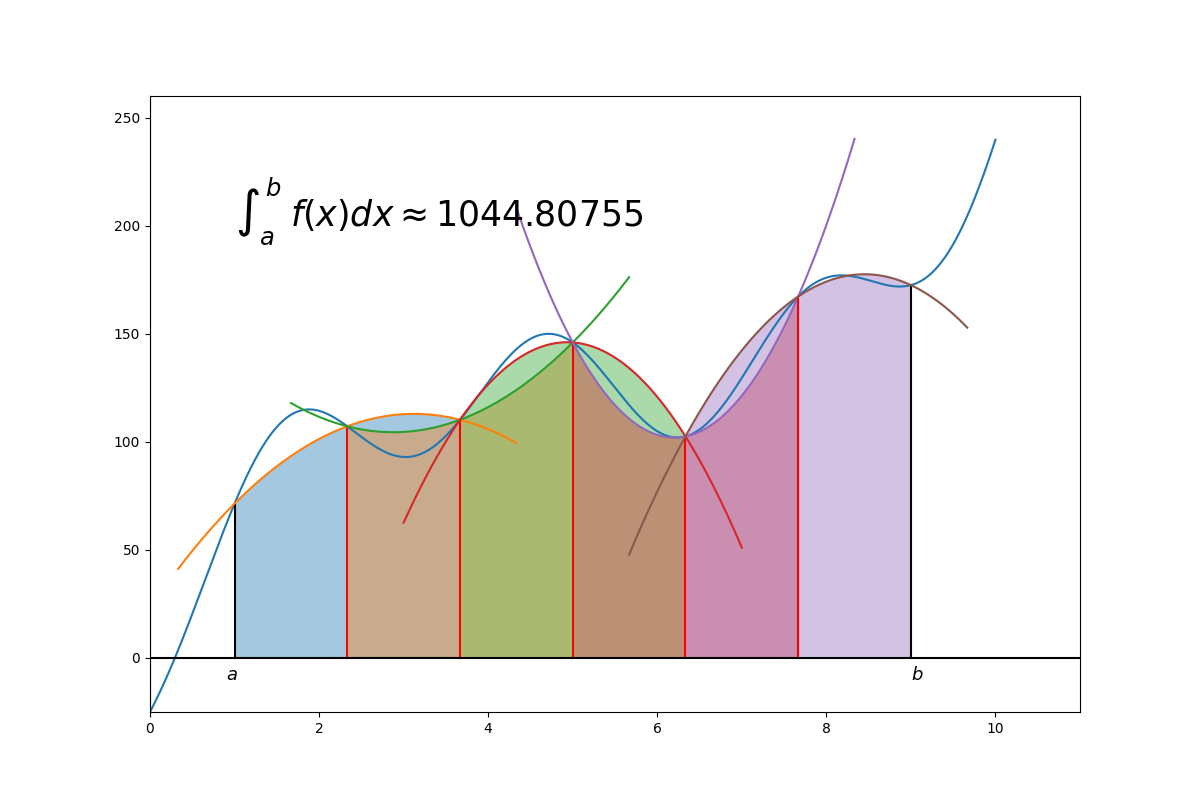

In [12]:
fig, ax = plt.subplots(figsize=((12,8)))


@widgets.interact(N=(2, 50, 2),a=(1, 9, 1),b=(2, 10, 1),extp=(1,5,1),dashed=False, dotted=False)

def update(N = 6, a = 1, b = 9, extp=2,dashed=False, dotted=False): 
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()

    h = (b-a)/N
    
    plt.plot(X,Fx)
    plt.xlim(0, 11)
    plt.ylim(-25, 260) 
    
    xy1 = (a, 0)
    xy2 = (a, float(f(a)))
    plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]],color='black')
    
    xy1B = (b, 0)
    xy2B = (b, float(f(b)))
    plt.plot([xy1B[0], xy2B[0]], [xy1B[1], xy2B[1]],color='black')
    
    
    plt.text(a-0.1,-10,r'$a$', size=13)
    plt.text(b,-10,r'$b$', size=13)
    
    I = IntegracionSimpson1(a,b,N,f)
    
    plt.text(1,200,r'$ \int_a^b \; f(x) dx \approx $'+str(round(I,5)), size=25)
    
    for i in range(1,N):
        x = a + i*h
        
        xy1A = (x, 0)
        xy2A = (x, float(f(x)))
        plt.plot([xy1A[0], xy2A[0]], [xy1A[1], xy2A[1]],color='r')
    
        xi = x-h
        x0 = x
        xd = x+h
        
        A = (1/(h**2))*( (1/2)*f(xi) - f(x0) + (1/2)*f(xd) )
        B = (1/(2*h))*( f(xd) - f(xi) )
        C = f(x0)
        
 
        
        # pinta parabola
        Xp = np.linspace(-extp,extp,100)
        Px = P(A,B,C,Xp) 
        if (dashed):
            plt.plot(Xp+(a+i*h),Px,linestyle='dashed')
        elif (dotted):
            plt.plot(Xp+(a+i*h),Px,linestyle='dotted',)
        else:
            plt.plot(Xp+(a+i*h),Px)
        
        #rellena Parabola
        Xp = np.linspace(-h,h,100)
        Px = P(A,B,C,Xp)
        plt.fill_between(Xp+(a+i*h),Px, alpha=0.4)
    
    
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')